In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
plt.style.use(['ggplot'])

# Create Data

<h5> Generate some data with:
\begin{equation} \theta_0= 4 \end{equation} 
\begin{equation} \theta_1= 3 \end{equation} 

Add some Gaussian noise to the data

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

Let's plot our data to check the relation between X and Y

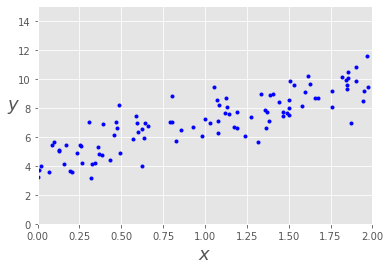

In [4]:

plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

#  Analytical way of Linear Regression

In [5]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.3131563 ]
 [2.77856219]]


<h5>This is close to our real thetas 4 and 3. It cannot be accurate due to the noise I have introduced in data

In [10]:
X_new = np.array([[0],[2]])

X_new_b = np.c_[np.ones((2,1)),X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.3131563 ],
       [9.87028068]])

<h5>Let's plot prediction line with calculated:theta

[0, 2, 0, 15]

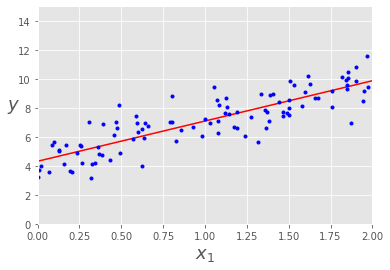

In [11]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


# Gradient Descent

## Cost Function & Gradients

<h4> The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have  to be derived from the cost functions



<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [12]:

def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


In [26]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        #print("Prediction")
        #print(prediction)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        #print("Theta")
        #print(theta)
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
        
    
    

<h3> Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution

In [25]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)
print(theta)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

[[-0.20645481]
 [ 0.64250033]]
Theta
[[-0.13999686]
 [ 0.71631229]]
Theta
[[-0.0749382]
 [ 0.7884667]]
Theta
[[-0.01124834]
 [ 0.85899985]]
Theta
[[0.05110256]
 [0.92794724]]
Theta
[[0.11214366]
 [0.99534361]]
Theta
[[0.17190351]
 [1.06122291]]
Theta
[[0.23041001]
 [1.12561838]]
Theta
[[0.28769047]
 [1.18856251]]
Theta
[[0.34377159]
 [1.25008709]]
Theta
[[0.39867951]
 [1.31022322]]
Theta
[[0.45243976]
 [1.3690013 ]]
Theta
[[0.50507735]
 [1.4264511 ]]
Theta
[[0.55661672]
 [1.4826017 ]]
Theta
[[0.60708179]
 [1.53748158]]
Theta
[[0.65649594]
 [1.59111857]]
Theta
[[0.70488207]
 [1.6435399 ]]
Theta
[[0.75226254]
 [1.69477221]]
Theta
[[0.79865926]
 [1.74484156]]
Theta
[[0.84409363]
 [1.79377344]]
Theta
[[0.8885866 ]
 [1.84159276]]
Theta
[[0.93215866]
 [1.88832392]]
Theta
[[0.97482985]
 [1.93399077]]
Theta
[[1.01661977]
 [1.97861663]]
Theta
[[1.0575476 ]
 [2.02222433]]
Theta
[[1.09763209]
 [2.06483618]]
Theta
[[1.13689158]
 [2.10647402]]
Theta
[[1.17534403]
 [2.1471592 ]]
Theta
[[1.21300698]


Theta
[[3.47857175]
 [3.47847052]]
Theta
[[3.47995088]
 [3.47733293]]
Theta
[[3.48132754]
 [3.47619697]]
Theta
[[3.48270174]
 [3.47506263]]
Theta
[[3.48407349]
 [3.47392991]]
Theta
[[3.4854428 ]
 [3.47279883]]
Theta
[[3.48680968]
 [3.47166939]]
Theta
[[3.48817412]
 [3.47054157]]
Theta
[[3.48953615]
 [3.4694154 ]]
Theta
[[3.49089577]
 [3.46829087]]
Theta
[[3.49225299]
 [3.46716797]]
Theta
[[3.49360781]
 [3.46604673]]
Theta
[[3.49496024]
 [3.46492712]]
Theta
[[3.49631029]
 [3.46380916]]
Theta
[[3.49765797]
 [3.46269285]]
Theta
[[3.49900329]
 [3.46157819]]
Theta
[[3.50034625]
 [3.46046518]]
Theta
[[3.50168685]
 [3.45935383]]
Theta
[[3.50302511]
 [3.45824412]]
Theta
[[3.50436104]
 [3.45713607]]
Theta
[[3.50569463]
 [3.45602968]]
Theta
[[3.50702591]
 [3.45492494]]
Theta
[[3.50835486]
 [3.45382186]]
Theta
[[3.50968151]
 [3.45272043]]
Theta
[[3.51100585]
 [3.45162066]]
Theta
[[3.5123279 ]
 [3.45052255]]
Theta
[[3.51364765]
 [3.4494261 ]]
Theta
[[3.51496512]
 [3.44833131]]
Theta
[[3.51628032]


Theta
[[3.86041174]
 [3.15875746]]
Theta
[[3.86115482]
 [3.15813347]]
Theta
[[3.86189667]
 [3.15751049]]
Theta
[[3.86263731]
 [3.15688854]]
Theta
[[3.86337673]
 [3.15626761]]
Theta
[[3.86411494]
 [3.1556477 ]]
Theta
[[3.86485194]
 [3.15502881]]
Theta
[[3.86558773]
 [3.15441093]]
Theta
[[3.86632231]
 [3.15379407]]
Theta
[[3.86705568]
 [3.15317821]]
Theta
[[3.86778785]
 [3.15256337]]
Theta
[[3.86851882]
 [3.15194954]]
Theta
[[3.86924859]
 [3.15133672]]
Theta
[[3.86997716]
 [3.1507249 ]]
Theta
[[3.87070453]
 [3.15011408]]
Theta
[[3.87143072]
 [3.14950427]]
Theta
[[3.8721557 ]
 [3.14889546]]
Theta
[[3.8728795 ]
 [3.14828765]]
Theta
[[3.87360212]
 [3.14768083]]
Theta
[[3.87432354]
 [3.14707501]]
Theta
[[3.87504378]
 [3.14647019]]
Theta
[[3.87576284]
 [3.14586636]]
Theta
[[3.87648072]
 [3.14526352]]
Theta
[[3.87719742]
 [3.14466167]]
Theta
[[3.87791295]
 [3.1440608 ]]
Theta
[[3.8786273 ]
 [3.14346092]]
Theta
[[3.87934048]
 [3.14286203]]
Theta
[[3.88005248]
 [3.14226412]]
Theta
[[3.88076332]


<h3> Let's plot the cost history over iterations

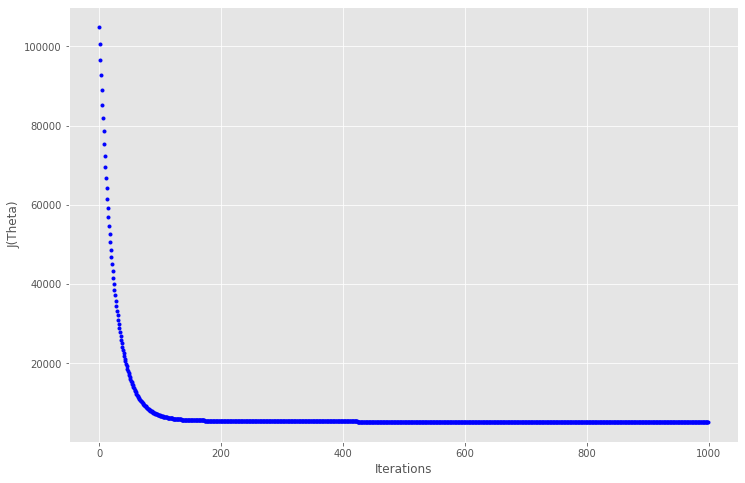

In [16]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

<h3> After around 150 iterations the cost is flat so the remaining iterations  are not needed or will not result in any further optimization. Let us zoom in till iteration 200 and see the curve

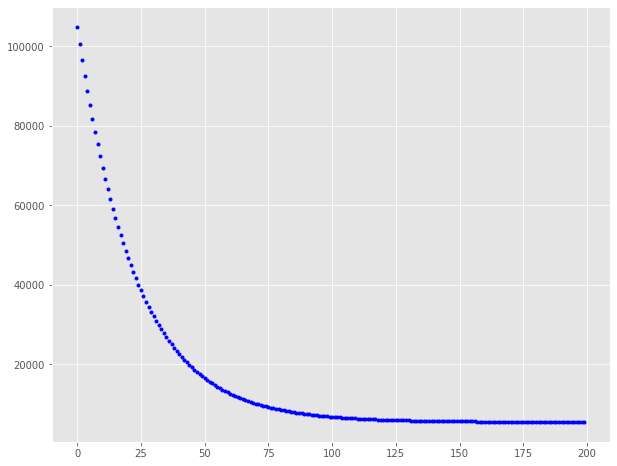

In [17]:

fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

<b>It is worth while to note that the cost drops faster initially and then the gain in cost reduction is not as much

### It would be great to see the effect of different learning rates and iterations together

### Let us  build a function which can show the effects together and also show how gradient decent actually is working

In [18]:

def plot_GD(n_iter,lr,ax,ax1=None):
     """
     n_iter = no of iterations
     lr = Learning Rate
     ax = Axis to plot the Gradient Descent
     ax1 = Axis to plot cost_history vs Iterations plot

     """
     _ = ax.plot(X,y,'b.')
     theta = np.random.randn(2,1)

     tr =0.1
     cost_history = np.zeros(n_iter)
     for i in range(n_iter):
        pred_prev = X_b.dot(theta)
        theta,h,_ = gradient_descent(X_b,y,theta,lr,1)
        pred = X_b.dot(theta)

        cost_history[i] = h[0]

        if ((i % 25 == 0) ):
            _ = ax.plot(X,pred,'r-',alpha=tr)
            if tr < 0.8:
                tr = tr+0.2
     if not ax1== None:
        _ = ax1.plot(range(n_iter),cost_history,'b.')  

### Plot the graphs for different iterations and learning rates combination

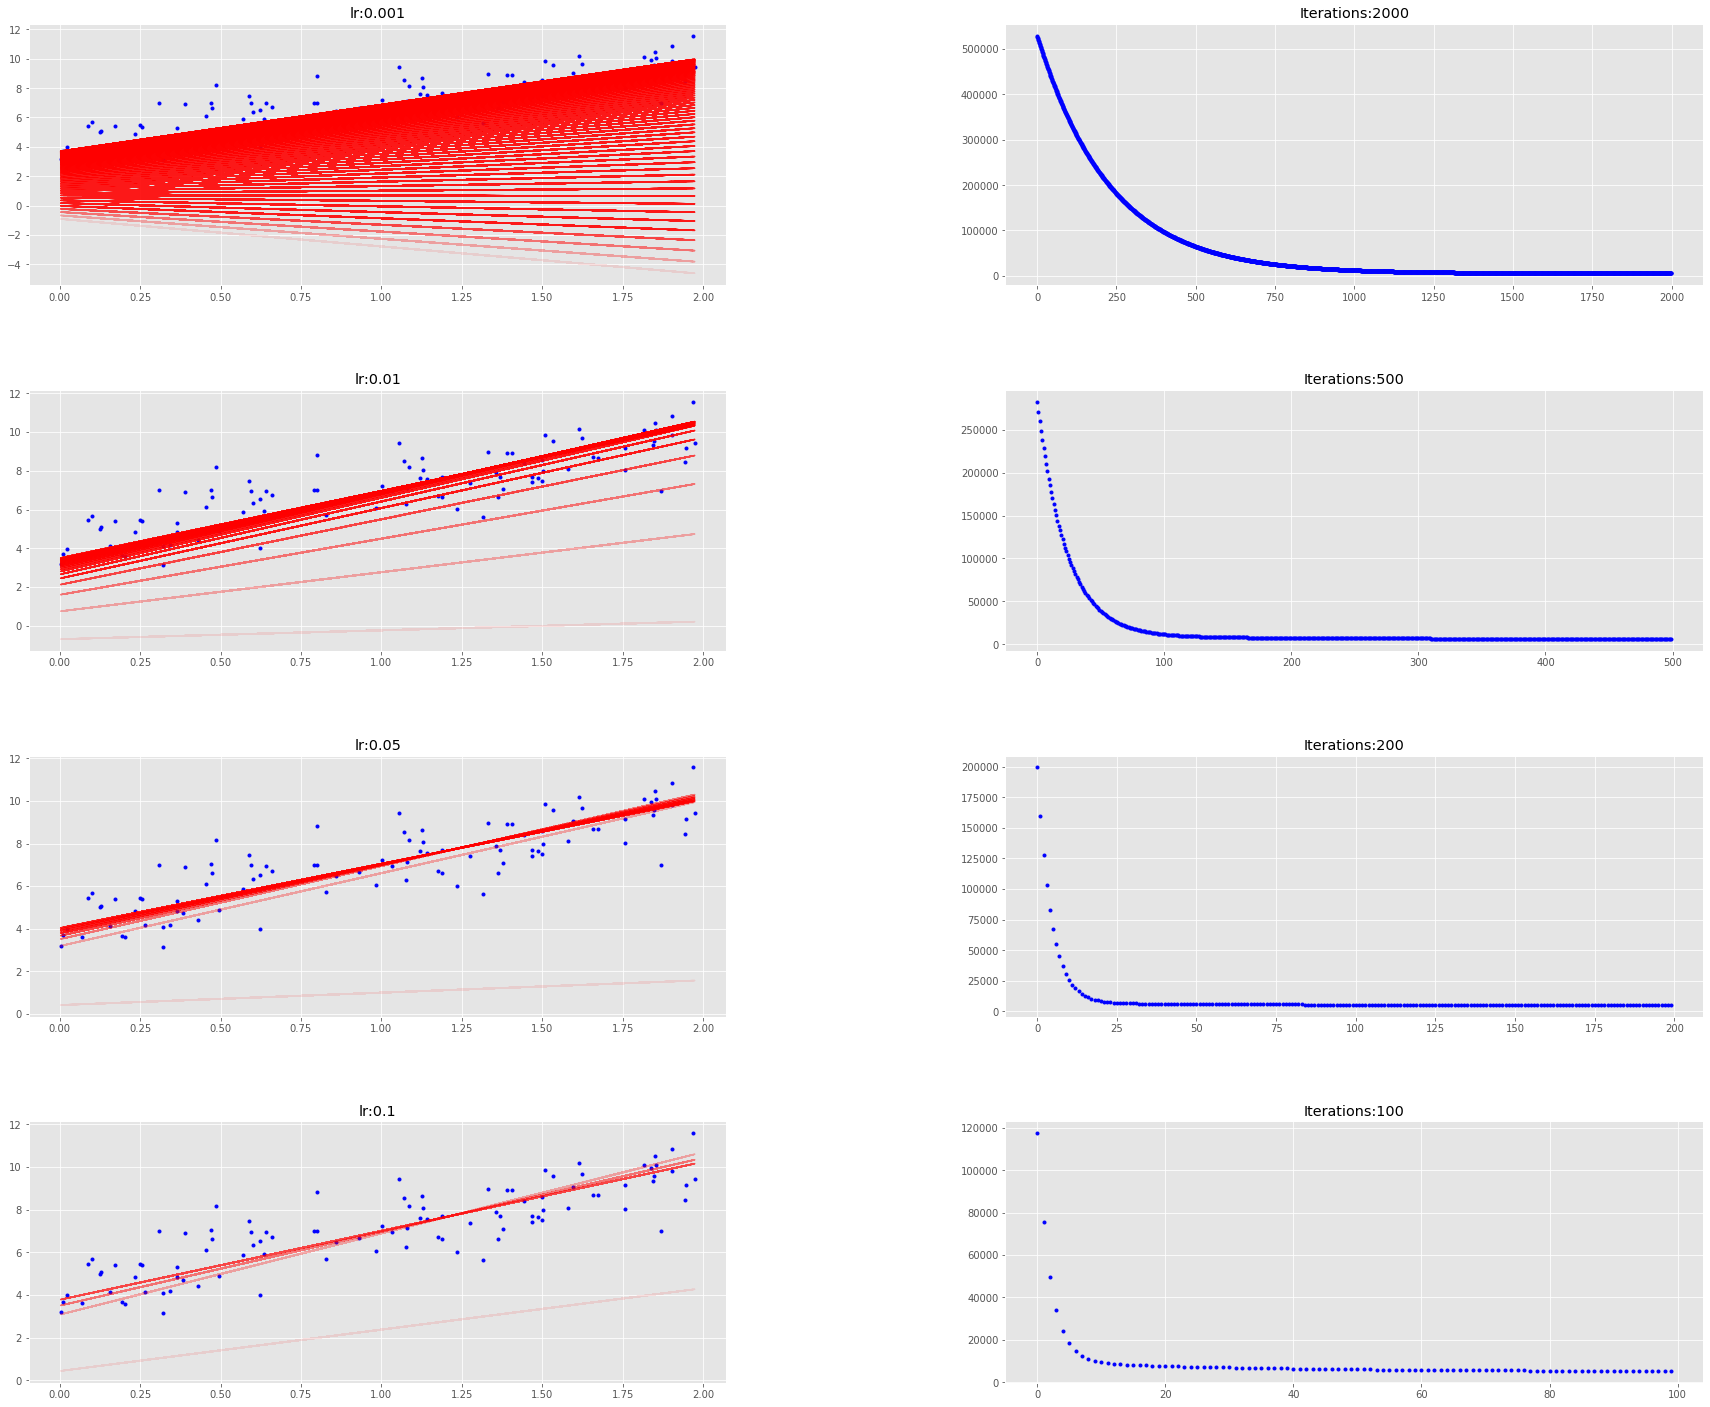

In [19]:
fig = plt.figure(figsize=(30,25))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

it_lr =[(2000,0.001),(500,0.01),(200,0.05),(100,0.1)]
count =0
for n_iter, lr in it_lr:
    count += 1
    
    ax = fig.add_subplot(4, 2, count)
    count += 1
   
    ax1 = fig.add_subplot(4,2,count)
    
    ax.set_title("lr:{}".format(lr))
    ax1.set_title("Iterations:{}".format(n_iter))
    plot_GD(n_iter,lr,ax,ax1)
    

<b> See how useful it is to visualize the effect of learning rates and iterations on gradient descent. The red lines show how the gradient descent starts and then slowly gets closer to the final value

## You can always plot Indiviual graphs to zoom in

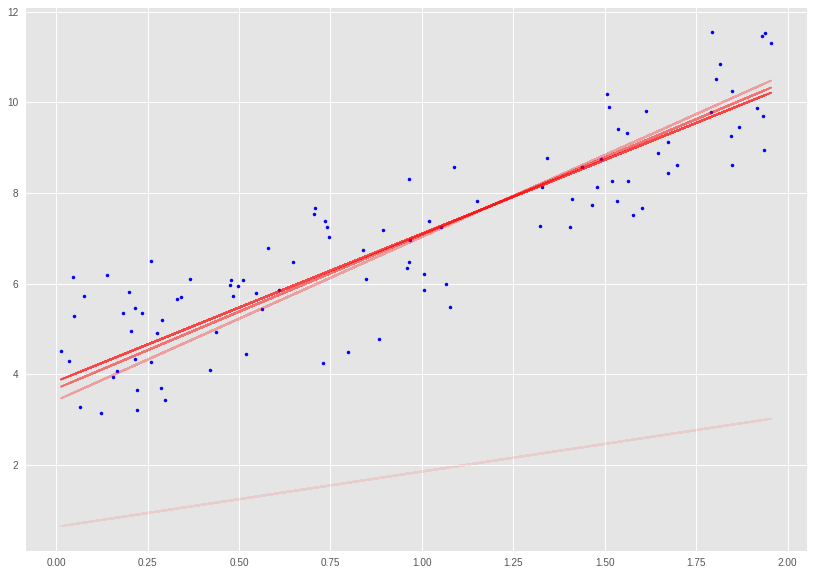

In [0]:
_,ax = plt.subplots(figsize=(14,10))
plot_GD(100,0.1,ax)

# Stochastic Gradient Descent

In [0]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [0]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.095,
Theta1:          3.055
Final cost/MSE:  49.489


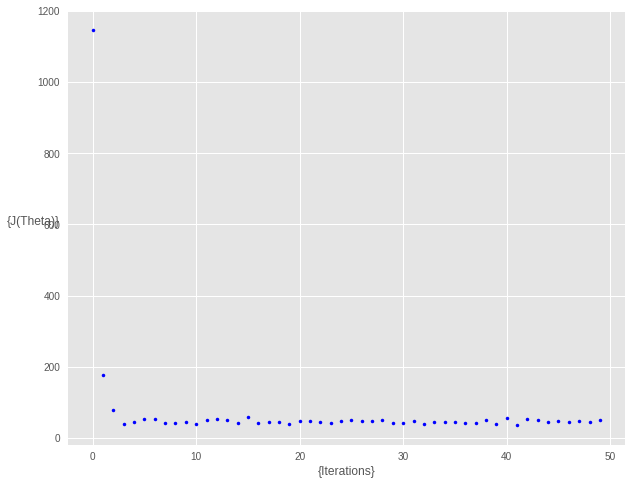

In [0]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

# Mini Batch Gradient Descent

In [0]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [0]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.084,
Theta1:          3.047
Final cost/MSE:  944.948


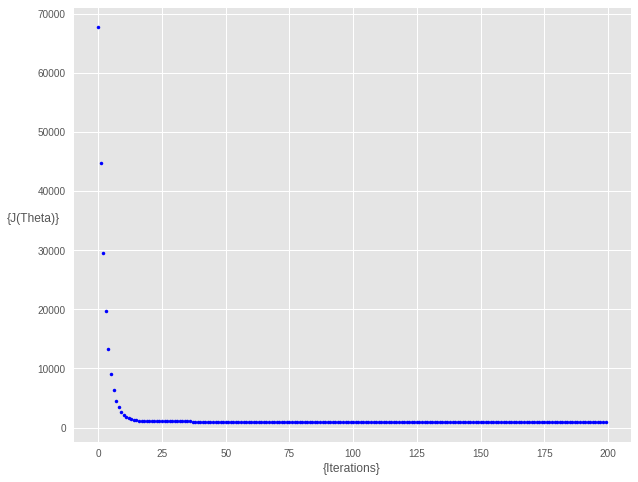

In [0]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')